# Random Forest Tuning

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import RandomForest
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-16 17:34:30.692 | INFO     | assignment_2.digits_classifiers.io:read_datasets:40 - Reading datasets


In [3]:
X, y = data

## Removing constant columns

In [4]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
X.drop(columns=always_zero, axis=1, inplace=True)

## Discard part of data

In [6]:
X, _, y, _ = train_test_split(X, y, test_size=0.95)

## Train Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [8]:
X_train

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

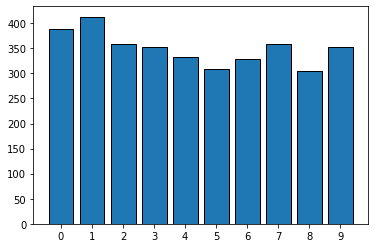

In [10]:
data.digit_distribution()

## Training Random Forest

In [ ]:
forest = [
    RandomForest(train=train, test=test, params={"n_estimators": ne, "max_depth": md})
    for ne in [100, 500, 1000]
    for md in [100, 150, 200]
]

In [12]:
tuning_forest = ClassifierTuning(classifiers=forest, base_estimator=RandomForest.default_estimator(), data=train, k=5)

In [13]:
tuning_forest.evaluate()

In [14]:
best_forest = RandomForest(train=train, test=test, params=tuning_forest.best_params)
best_forest

[RandomForest: Train 2800, Test 700, not fitted, not predicted] [N-trees: 1000; Max-depth: 200]

In [18]:
best_forest.train()
best_forest.predict()
best_forest.accuracy

0.9242857142857143

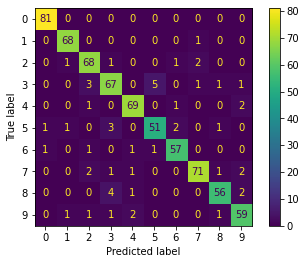

In [19]:
best_forest.confusion_matrix()